In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/archive/imdb_top_1000.csv'
data = pd.read_csv(path)

In [ ]:
data

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,0
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,0
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,0


In [ ]:
print("The dataset contains {} rows and {} columns".format(data.shape[0], data.shape[1]))

The dataset contains 706 rows and 20 columns


# **1**. **DATA** **PREPROCESSING**

1.(i) cleaning to remove noisy data

In [ ]:
#list missing data
data.isnull().sum()

,0
Poster_Link,0
Movies_Title,0
Released_Year,0
Certificate,0
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,0
Director,0


In [ ]:
# fill in missing values, smooth noisy data, identify outliers and resolve inconsitencies

import pandas as pd
import numpy as np

'''for numerical data'''
# numerical columns with missing values
numerical_cols = data.select_dtypes(include=np.number).columns
missing_numerical = data[numerical_cols].isnull().sum()
missing_numerical = missing_numerical[missing_numerical>0]

# filling missing numerical values with the mean of the column
for col in missing_numerical.index:
    data[col].fillna(data[col].mean(), inplace=True)

'''for categorical data'''
# categorical columns with missing values
categorical_cols = data.select_dtypes(exclude=np.number).columns
missing_categorical = data[categorical_cols].isnull().sum()
missing_categorical = missing_categorical[missing_categorical>0]

# filling missing categorical values with the mode of the column
for col in missing_categorical.index:
    data[col].fillna(data[col].mode()[0], inplace=True)

# identifying outliers using IQR method
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.clip(data[col], lower_bound, upper_bound)

# smoothing noisy data using a rolling mean (Runtime - adjust window size as needed)
data['Runtime'] = data['Runtime'].rolling(window=1, center=True).mean()  # Use rolling mean

# handle inconsistencies (replacing inconsistent certificate values)
data['Certificate'] = data['Certificate'].replace({'Unrated': 'Not Rated'}) # Example replacement

# print
data

1. (ii) data selection to identify the task relavent attributes

PLOTS
1.
2.
3.
4.
5.
6.
7.
8.
9.
10.

ARM
1. FP-Growth
2. Naive Bayesian classification/ Hierarchical clustering algorithm
3. CFIs using CLOSET

In [ ]:
# 'Movies_Title': The title of the movie.  Essential for recommendations.
# 'Released_Year':  Could help filter by era.
# 'Genre': A key factor in recommending similar movies.
# 'IMDB_Rating': A direct measure of user preference and quality.
# 'Overview': A synopsis of the movie; useful for content-based recommendations.
# 'Director': A director's style can influence recommendations.
# 'Star1', 'Star2', 'Star3', 'Star4': Actors can be a major factor in preferences.

selected_attributes = data[['Movies_Title', 'Released_Year', 'Genre', 'IMDB_Rating', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']]

data

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BZjA0OW...,One Flew Over the Cuckoo's Nest,1975.0,A,120.017379,Drama,8.45,A criminal pleads insanity and is admitted to ...,83.0,Milos Forman,Jack Nicholson,Louise Fletcher,Michael Berryman,Peter Brocco,679172.75,112000000.0
1,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020.0,PG-13,120.017379,"Biography, Drama, History",8.45,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291.00,0.0
2,https://m.media-amazon.com/images/M/MV5BYWZjMj...,Gisaengchung,2019.0,A,136.000000,"Comedy, Drama, Thriller",8.45,Greed and class discrimination threaten the ne...,96.0,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,552778.00,53367844.0
3,https://m.media-amazon.com/images/M/MV5BOTMwYj...,Cidade de Deus,2002.0,A,132.600000,"Crime, Drama",8.45,"In the slums of Rio, two kids' paths diverge a...",79.0,Fernando Meirelles,Kátia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele,679172.75,7563397.0
4,https://m.media-amazon.com/images/M/MV5BMjlmZm...,Sen to Chihiro no kamikakushi,2001.0,U,127.200000,"Animation, Adventure, Family",8.45,"During her family's move to the suburbs, a sul...",96.0,Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi,651376.00,10055859.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961.0,A,122.100000,"Comedy, Drama, Romance",7.60,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544.00,0.0
702,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956.0,G,119.300000,"Drama, Western",7.60,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075.00,0.0
703,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953.0,Passed,119.100000,"Drama, Romance, War",7.60,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374.00,30500000.0
704,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944.0,A,120.017379,"Drama, War",7.60,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471.00,0.0


1. (iii) Data Transformation - to represent the data in the require form

In [ ]:
# converting 'Released_Year' to datetime objects for easier time-based analysis
data['Released_Year'] = pd.to_datetime(data['Released_Year'], format='%Y', errors='coerce')

'''creating new features for descriptive analysis'''
# 1. Decade of release
data['Decade'] = (data['Released_Year'].dt.year // 10) * 10

# 2: Runtime category (short, medium, long)
data['Runtime_Category'] = pd.cut(data['Runtime'], bins=[0, 90, 120, float('inf')], labels=['Short', 'Medium', 'Long'])

# 3: Genre groups (combining similar genres)
# First, create an empty list to store the genre groups
genre_groups = []
# Loop through each row in the DataFrame
for index, row in data.iterrows():
  # Split the 'Genre' column into individual genres
  genres = row['Genre'].split(', ')
  # Create an empty list to store the genre group
  group = []
  for genre in genres:
      if 'Action' in genre or 'Adventure' in genre:
          group.append('Action/Adventure')
      elif 'Comedy' in genre:
          group.append('Comedy')
      elif 'Drama' in genre:
          group.append('Drama')
      elif 'Horror' in genre:
          group.append('Horror')
      elif 'Sci-Fi' in genre or 'Fantasy' in genre:
          group.append('Sci-Fi/Fantasy')
      else:
          group.append('Other')

  genre_groups.append(', '.join(set(group))) # Joining unique genres to avoid repeating the same genre multiple times
data['Genre_Group'] = genre_groups # Assign genre group to dataframe


# 4. column IMDB_Rating_Category from IMDB ---> BINNING

data['IMDB_Rating_Category'] = pd.cut(data['IMDB_Rating'],
                                     bins=[0, 3, 5, 7, 9, 10, float('inf')],
                                     labels=['Very Low','Low','Average','High','Very High', 'Exceptional'])

data


,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Decade,Runtime_Category,Genre_Group,IMDB_Rating_Category
0,https://m.media-amazon.com/images/M/MV5BZjA0OW...,One Flew Over the Cuckoo's Nest,1975-01-01,A,120.017379,Drama,8.45,A criminal pleads insanity and is admitted to ...,83.0,Milos Forman,Jack Nicholson,Louise Fletcher,Michael Berryman,Peter Brocco,679172.75,112000000.0,1970,Long,Drama,High
1,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020-01-01,PG-13,120.017379,"Biography, Drama, History",8.45,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291.00,0.0,2020,Long,"Other, Drama",High
2,https://m.media-amazon.com/images/M/MV5BYWZjMj...,Gisaengchung,2019-01-01,A,136.000000,"Comedy, Drama, Thriller",8.45,Greed and class discrimination threaten the ne...,96.0,Bong Joon Ho,Kang-ho Song,Lee Sun-kyun,Cho Yeo-jeong,Choi Woo-sik,552778.00,53367844.0,2010,Long,"Comedy, Other, Drama",High
3,https://m.media-amazon.com/images/M/MV5BOTMwYj...,Cidade de Deus,2002-01-01,A,132.600000,"Crime, Drama",8.45,"In the slums of Rio, two kids' paths diverge a...",79.0,Fernando Meirelles,Kátia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele,679172.75,7563397.0,2000,Long,"Other, Drama",High
4,https://m.media-amazon.com/images/M/MV5BMjlmZm...,Sen to Chihiro no kamikakushi,2001-01-01,U,127.200000,"Animation, Adventure, Family",8.45,"During her family's move to the suburbs, a sul...",96.0,Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi,651376.00,10055859.0,2000,Long,"Action/Adventure, Other",High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961-01-01,A,122.100000,"Comedy, Drama, Romance",7.60,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544.00,0.0,1960,Long,"Comedy, Other, Drama",High
702,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956-01-01,G,119.300000,"Drama, Western",7.60,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075.00,0.0,1950,Medium,"Other, Drama",High
703,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953-01-01,Passed,119.100000,"Drama, Romance, War",7.60,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374.00,30500000.0,1950,Medium,"Other, Drama",High
704,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944-01-01,A,120.017379,"Drama, War",7.60,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471.00,0.0,1940,Long,"Other, Drama",High


Finding correlation


              Runtime  IMDB_Rating  Meta_score  No_of_Votes     Gross  \
Runtime      1.000000     0.361232   -0.033370     0.253793  0.113622   
IMDB_Rating  0.361232     1.000000    0.295581     0.353864 -0.077887   
Meta_score  -0.033370     0.295581    1.000000    -0.052725 -0.165605   
No_of_Votes  0.253793     0.353864   -0.052725     1.000000  0.540466   
Gross        0.113622    -0.077887   -0.165605     0.540466  1.000000   
Decade       0.166187    -0.193821   -0.359637     0.260861  0.197344   

               Decade  
Runtime      0.166187  
IMDB_Rating -0.193821  
Meta_score  -0.359637  
No_of_Votes  0.260861  
Gross        0.197344  
Decade       1.000000  


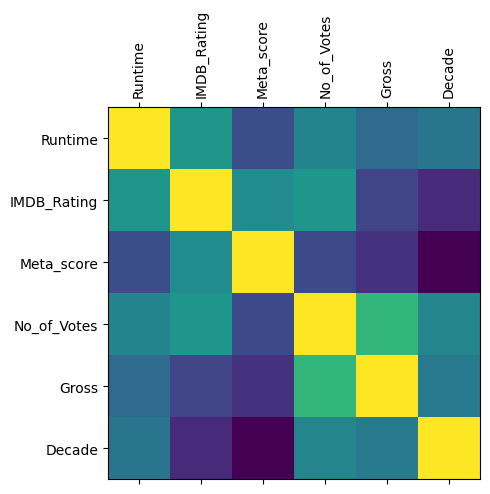

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix on numeric data
correlation_matrix = numeric_data.corr()

print(correlation_matrix)
plt.matshow(correlation_matrix)

# Get column names for x and y ticks
column_names = numeric_data.columns

# Set x and y ticks with column names
plt.xticks(range(len(column_names)), column_names, rotation=90)  # Rotate x-axis labels for readability
plt.yticks(range(len(column_names)), column_names)

plt.show()


    IMDB_Rating and Meta_score: There's likely a strong positive correlation between IMDB_Rating and Meta_score, suggesting that movies with higher IMDB ratings also tend to have higher Meta_scores. This indicates agreement between these two rating systems.

    IMDB_Rating/Meta_score and No_of_Votes: You might observe a moderate positive correlation between IMDB_Rating/Meta_score and No_of_Votes. This implies that more popular or well-received movies (higher ratings) tend to have more votes.

    IMDB_Rating/Meta_score and Gross: There could be a weak to moderate positive correlation between IMDB_Rating/Meta_score and Gross. This suggests that movies with better ratings might tend to have higher box office earnings, although the relationship might not be very strong.
    
    No_of_Votes and Gross: There's likely a moderate to strong positive correlation between No_of_Votes and Gross, indicating that movies with more votes or popularity tend to generate higher box office revenue.


AttributeError: module 'matplotlib.pyplot' has no attribute 'shw'

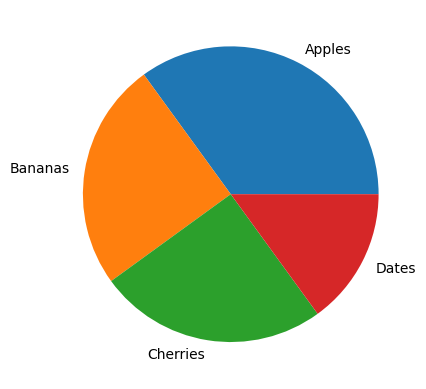

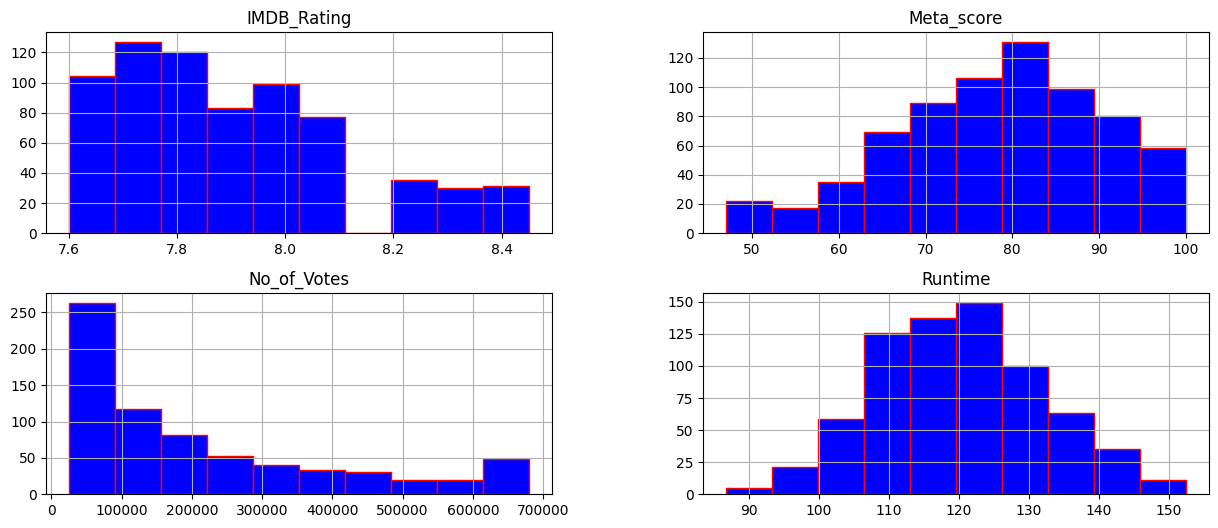

In [ ]:
numerical_attributes = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime']
data[numerical_attributes].hist(figsize = (15, 6), color = 'blue', edgecolor = 'red', layout = (2, 2));

In [ ]:
data.describe(include = ['O'])

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4
count,1000,1000,1000,899,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,999,100,16,140,202,1000,548,660,841,891,939
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,Two imprisoned men bond over a number of years...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine
freq,1,2,32,234,23,85,1,14,12,7,5,4


In [ ]:
top_voted = data.sort_values(['No_of_Votes'], ascending = False)

<ipython-input-21-8833eeb2e419>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['No_of_Votes'][:7], palette = 'hls')


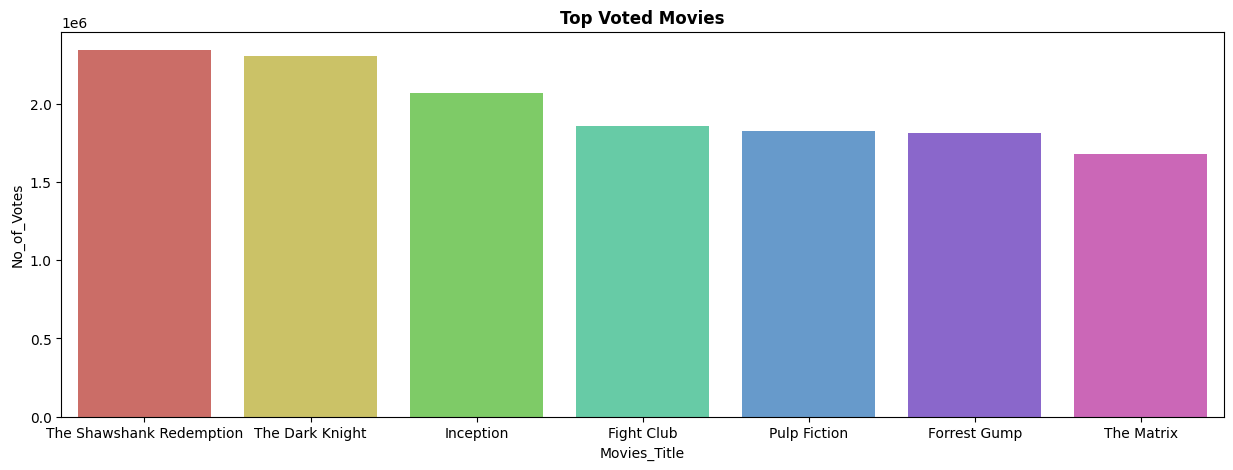

In [ ]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['No_of_Votes'][:7], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

<ipython-input-22-b5925d8464b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['IMDB_Rating'][:7], palette = 'husl')


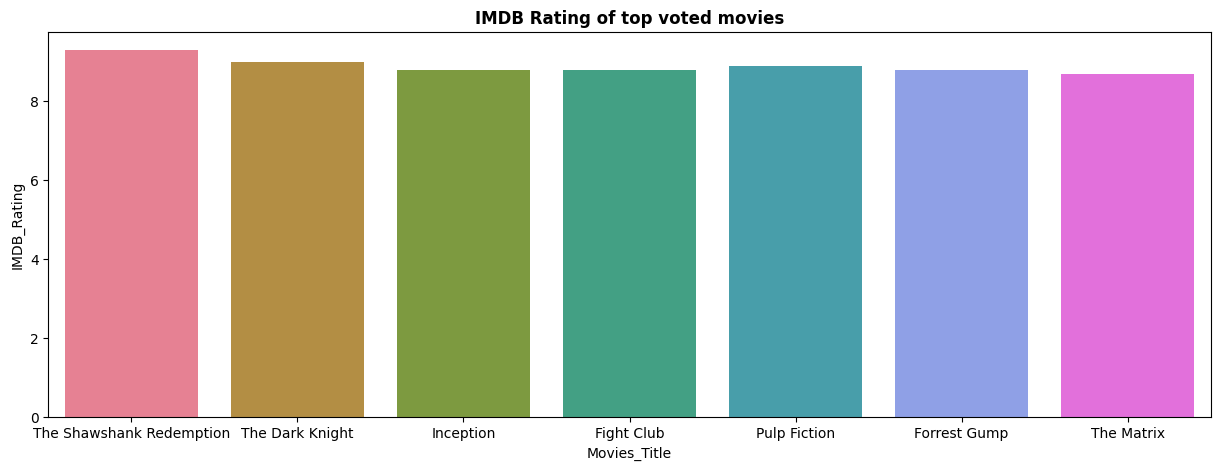

In [ ]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['IMDB_Rating'][:7], palette = 'husl')
g.set_title("IMDB Rating of top voted movies", weight = "bold")
plt.show()

<ipython-input-23-6d9ed5a9de30>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['Meta_score'][:7], palette = 'husl')


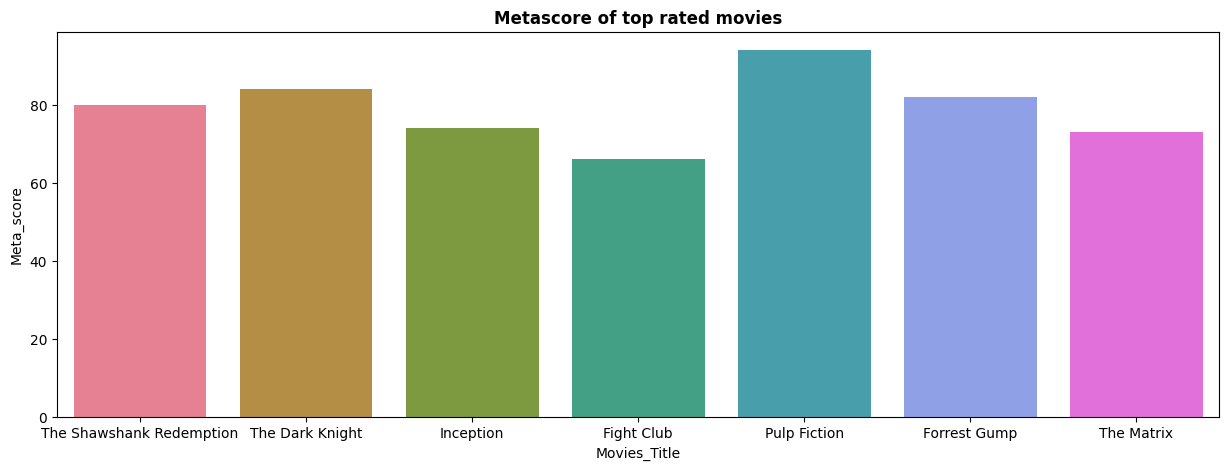

In [ ]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['Meta_score'][:7], palette = 'husl')
g.set_title("Metascore of top rated movies", weight = "bold")
plt.show()

<ipython-input-24-d30b9796f6d4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['Gross'][:7], palette = 'husl')


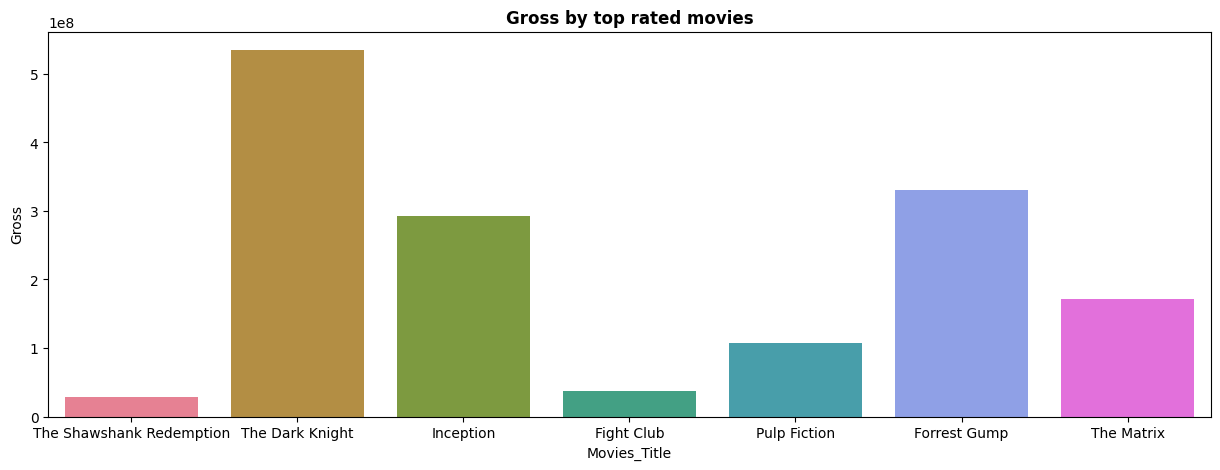

In [ ]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['Gross'][:7], palette = 'husl')
g.set_title("Gross by top rated movies", weight = "bold")
plt.show()

<ipython-input-25-99d6128439ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=highest_earning['Movies_Title'][:7],y=highest_earning['Gross'][:7], palette = 'husl')


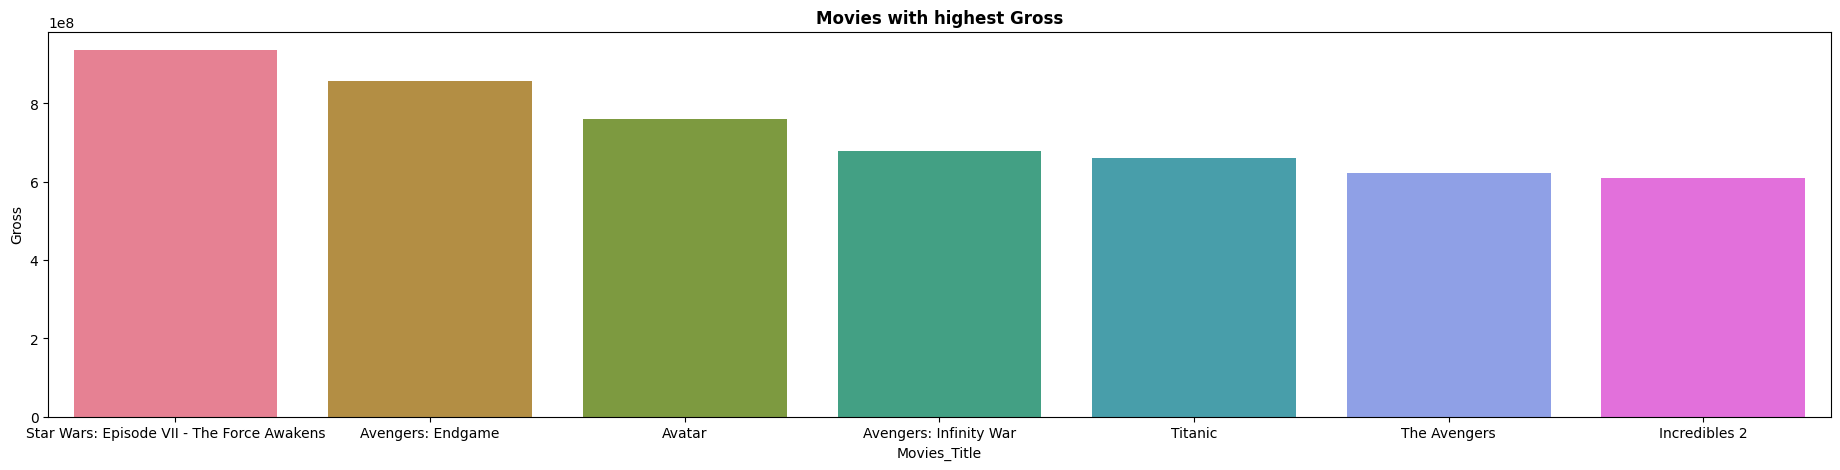

In [ ]:
highest_earning = data.sort_values(['Gross'], ascending = False)
fig,axs=plt.subplots(figsize=(23,5))
g=sns.barplot(x=highest_earning['Movies_Title'][:7],y=highest_earning['Gross'][:7], palette = 'husl')
g.set_title("Movies with highest Gross", weight = "bold")
plt.show()